In [1]:
# import packages
from astropy.io import fits
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from lmfit import Model, fit_report
from lmfit.models import LinearModel

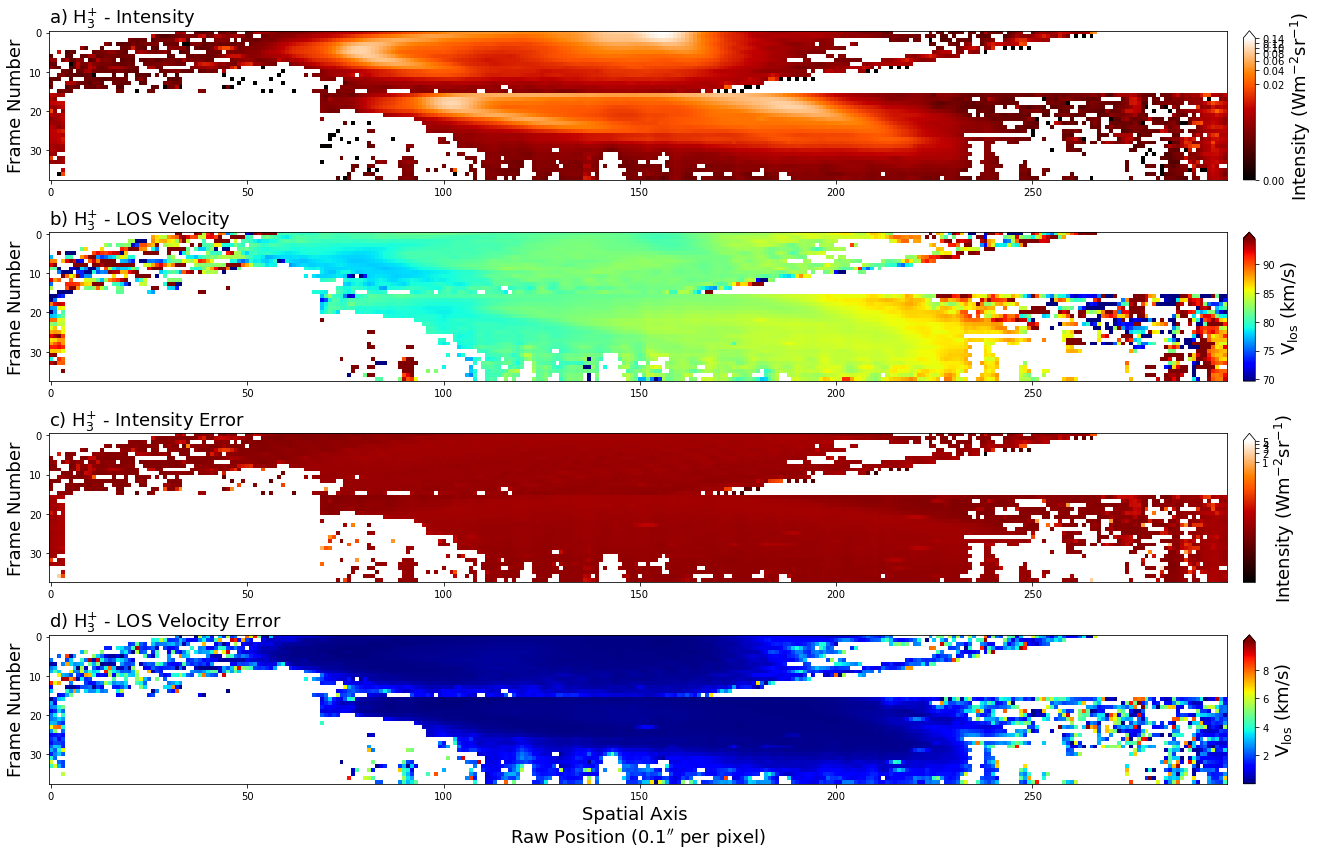

In [2]:
h3p_int_shifted = fits.open('h3p_int_shifted.fits', ignore_missing_end=True)[0].data
h3p_los_shifted = fits.open('h3p_los_shifted.fits', ignore_missing_end=True)[0].data
h3p_int_shifted_error = fits.open('h3p_int_shifted_error.fits', ignore_missing_end=True)[0].data
h3p_los_shifted_error = fits.open('h3p_los_shifted_error.fits', ignore_missing_end=True)[0].data

fig = plt.figure(figsize=(24,12), tight_layout=True)

fig.add_subplot(411)
plt.imshow(h3p_int_shifted, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.2))
# plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('a) H$_3^{+}$ - Intensity', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=18)

fig.add_subplot(412)
plt.imshow(h3p_los_shifted, cmap='jet')
# plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('b) H$_3^{+}$ - LOS Velocity', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{los}}$ (km/s)',size=18)

fig.add_subplot(413)
# colMap = cm.gist_heat
# colMap.set_bad(color='white')
plt.imshow(h3p_int_shifted_error, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.1))
# plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('c) H$_3^{+}$ - Intensity Error', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=18)

fig.add_subplot(414)
plt.imshow(h3p_los_shifted_error, cmap='jet')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('d) H$_3^{+}$ - LOS Velocity Error', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{los}}$ (km/s)',size=18)

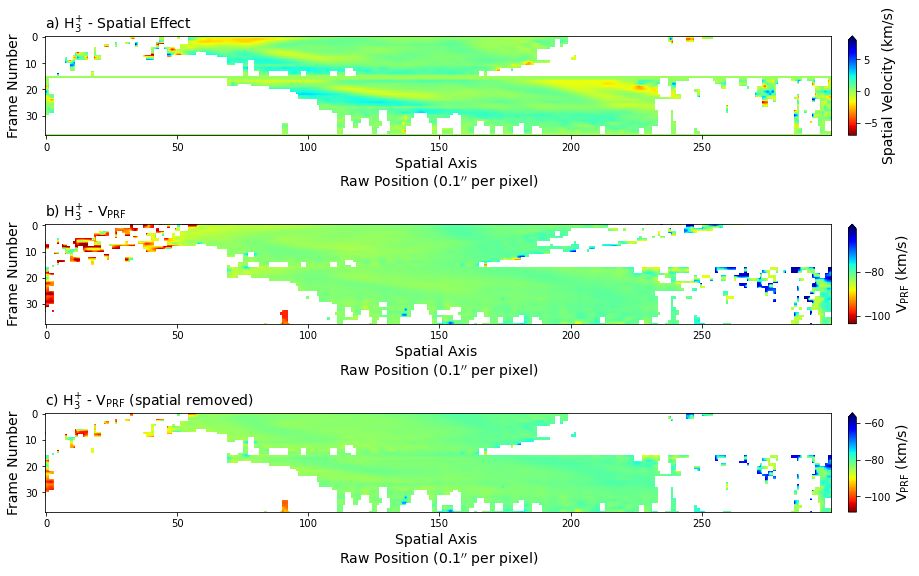

In [3]:
ang_diam = 40.58867
ang_diam/(0.1)
limb_vel = 12.572
vel_slope = limb_vel * 2 / (ang_diam/(0.1))

x = np.linspace(0,299,300)
rot_rate = vel_slope * x
rot_rate = rot_rate - rot_rate[150]

h3p_plan_vel = h3p_los_shifted + 0

for i in range(np.size(h3p_los_shifted, 0)):
    h3p_plan_vel[i,:] = h3p_los_shifted[i,:] - rot_rate


spatial_velocity = h3p_int_shifted + 0
spatial_velocity[::] = 0

for i in range(np.size(spatial_velocity, 1)):
    for j in range(1, np.size(spatial_velocity, 0)-1):
        if j not in (15,16):
            y = np.arange(3)
            p = np.array((h3p_int_shifted[j-1][i], h3p_int_shifted[j][i], h3p_int_shifted[j+1][i]))
#             print(j,i)
    #         plt.figure()
    #         plt.plot(y, p, 'k.', label='original')
            f = sp.interpolate.interp1d(y,p)
            xnew = np.linspace(0,2,7)
    #         plt.figure()
    #         plt.plot(xnew, f(xnew), 'r.', label='interpolate')
    #         plt.legend()
    #         print(f(xnew[2]), f(xnew[4]))
            p1 = f(xnew[2])
            p3 = f(xnew[4])
            di = (p3 - p1)/(p3 + p1)
            dv = 7.99*di

            if np.isreal(dv):
                spatial_velocity[j,i] = dv

# spatial_velocity2[np.isnan(h3p_plan_vel2)] = np.nan

h3p_corrected_vel = h3p_plan_vel-spatial_velocity

fig = plt.figure(figsize=(24,8), tight_layout=True)

fig.add_subplot(311)
plt.imshow(spatial_velocity*(-1), cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('a) H$_3^{+}$ - Spatial Effect', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Spatial Velocity (km/s)',size=14)

fig.add_subplot(312)
plt.imshow(h3p_plan_vel*(-1), cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('b) H$_3^{+}$ - V$_{\mathrm{PRF}}$', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

fig.add_subplot(313)
plt.imshow(h3p_corrected_vel*(-1), cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('c) H$_3^{+}$ - V$_{\mathrm{PRF}}$ (spatial removed)', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

nan
nan
nan
nan
nan
nan
0.009437225260407136
-0.25308433096587496
nan
nan
nan


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


nan
0.03300923344802121
nan
-0.00033377317263769894
-0.03933786677741438
0.3974611890502156
0.019049683656581416
-0.489754922630524
-0.14025994363896013
0.2230088246901116
0.1119609907704232
0.008417956008181817
-0.00944117945053747
-0.029839878840210984
-0.07776491545975399
-0.008606496695864264
-0.04260987517126791
0.42742270387618514
-0.00011323541813136163
nan
nan
nan
nan


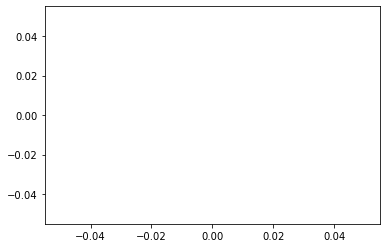

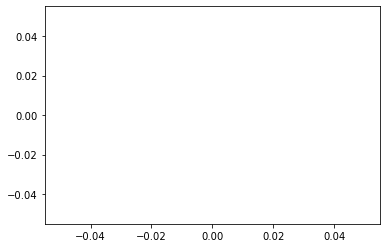

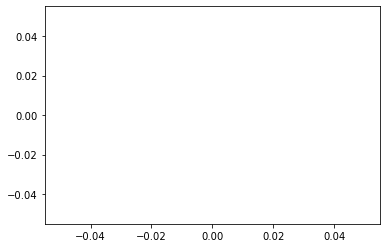

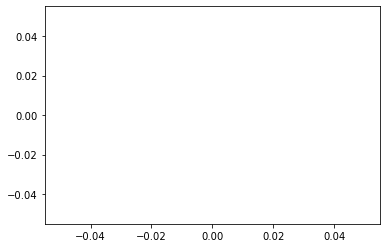

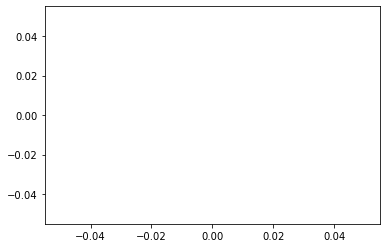

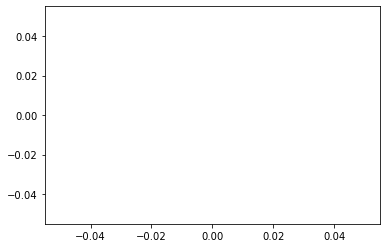

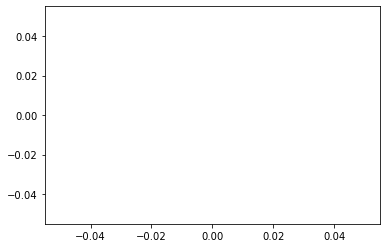

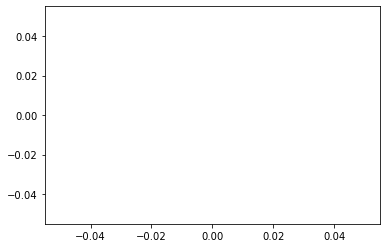

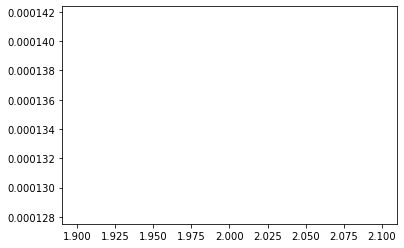

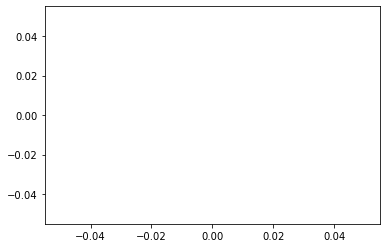

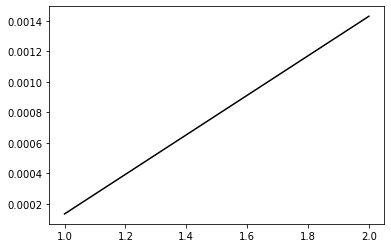

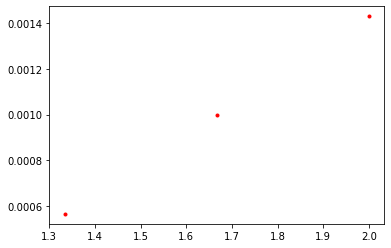

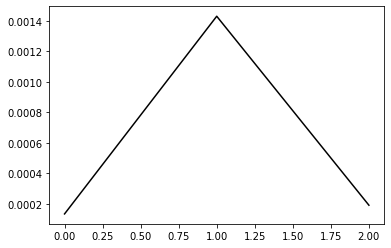

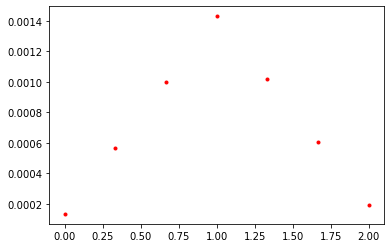

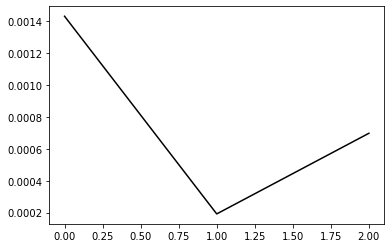

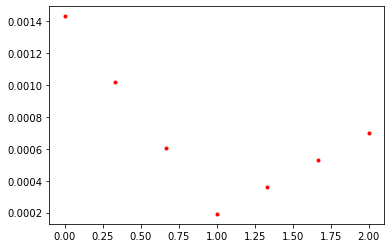

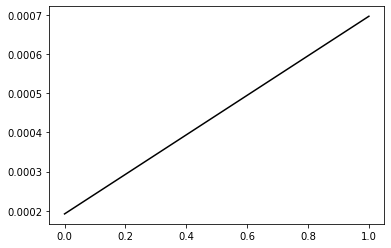

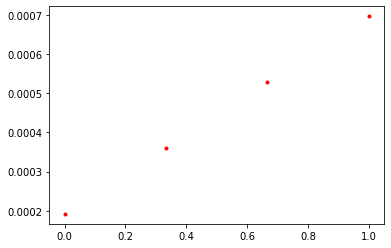

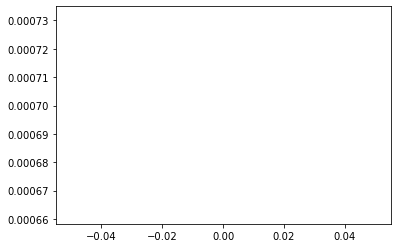

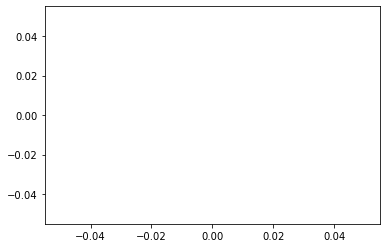

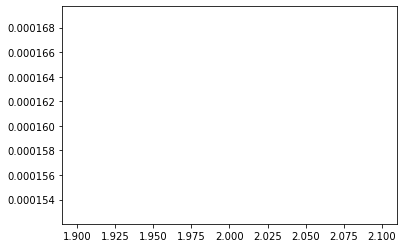

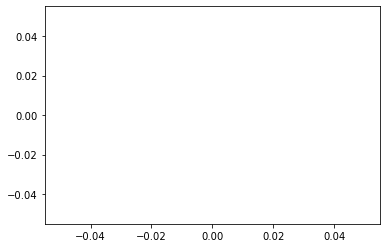

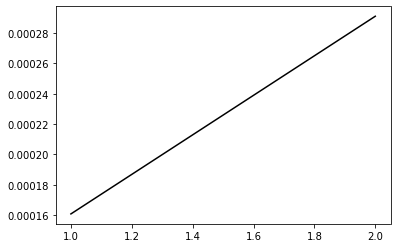

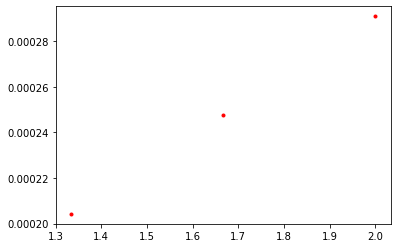

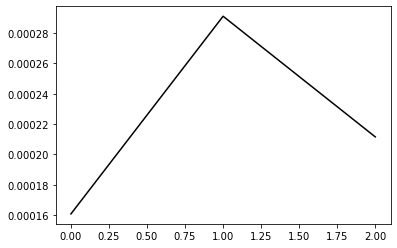

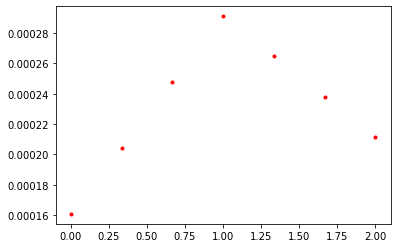

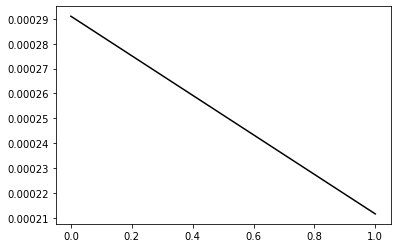

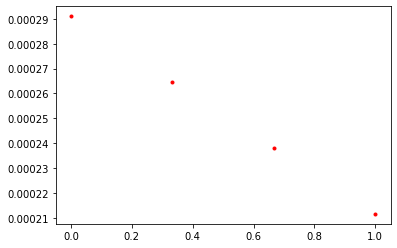

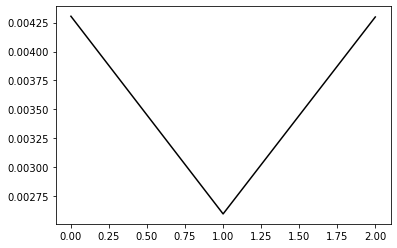

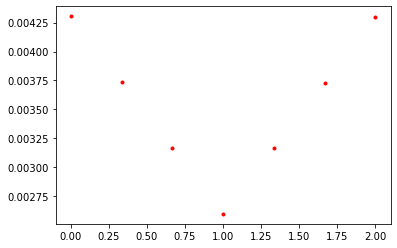

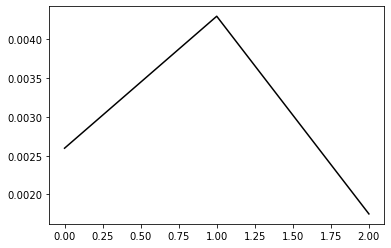

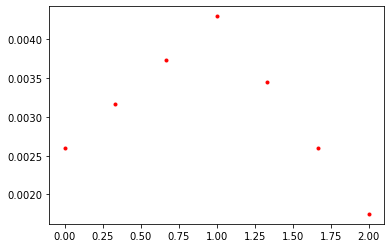

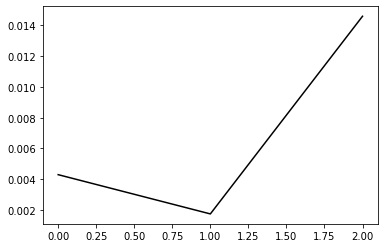

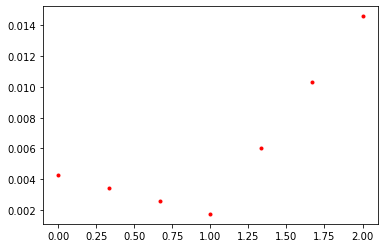

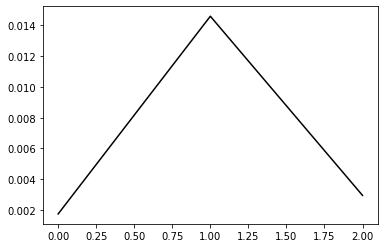

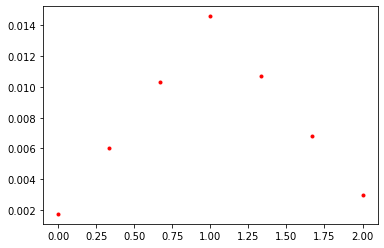

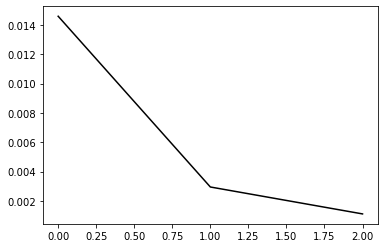

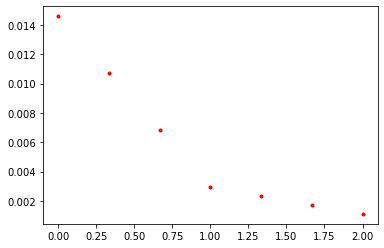

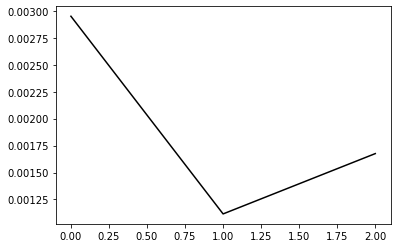

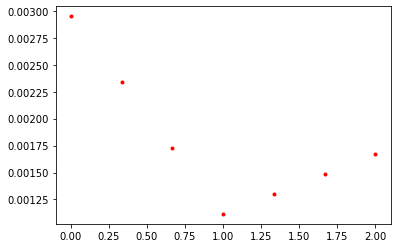

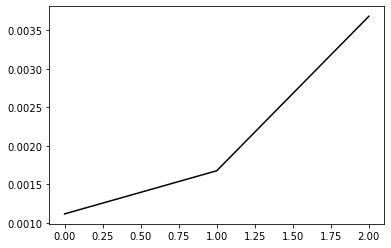

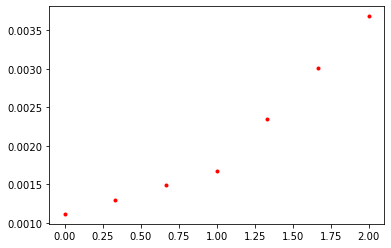

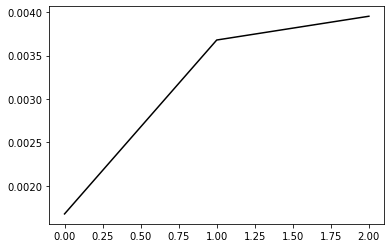

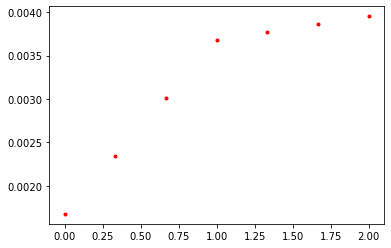

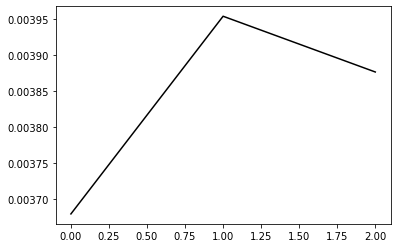

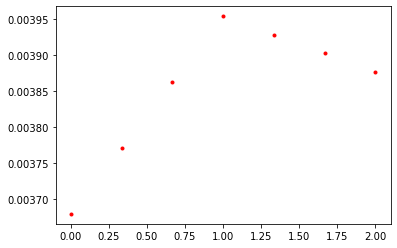

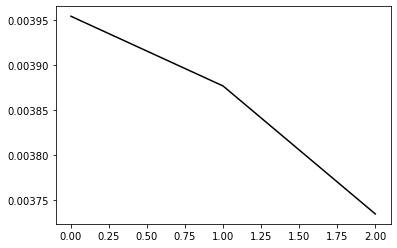

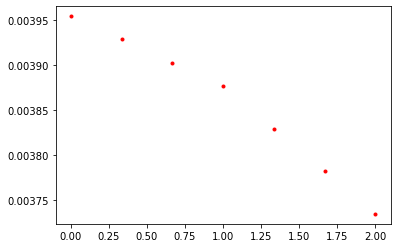

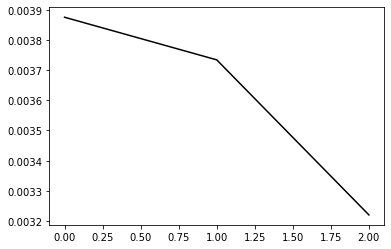

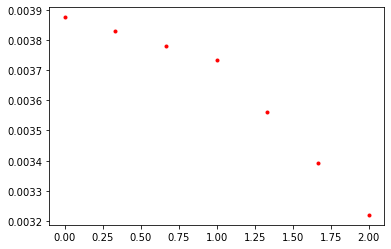

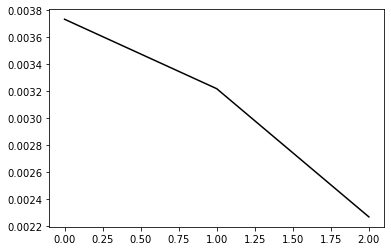

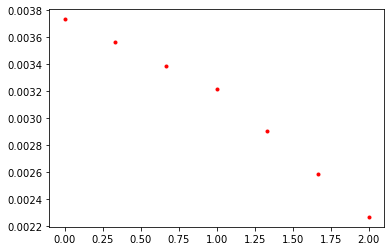

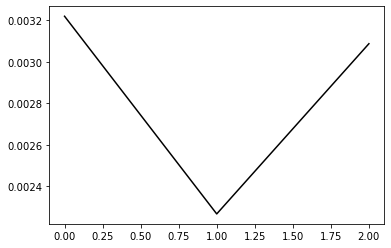

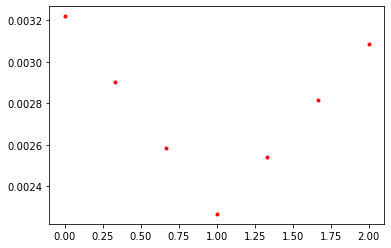

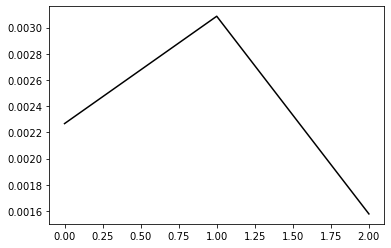

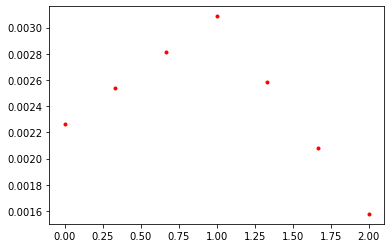

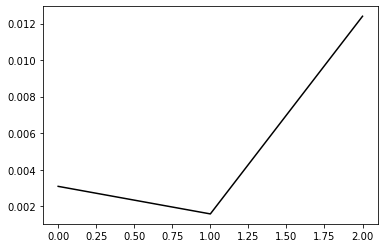

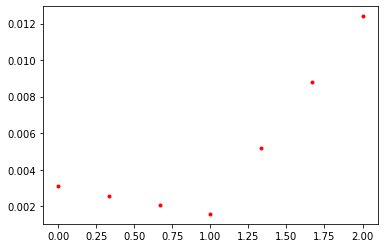

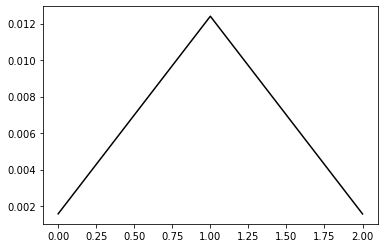

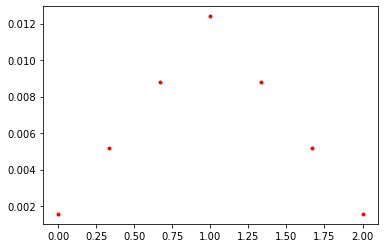

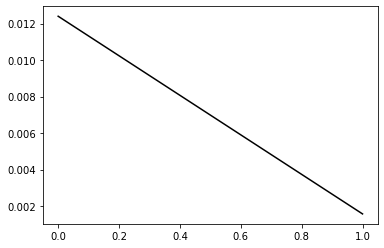

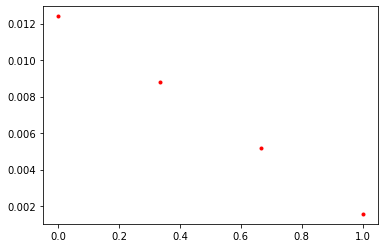

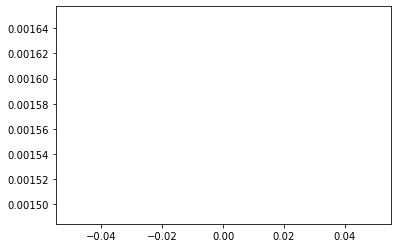

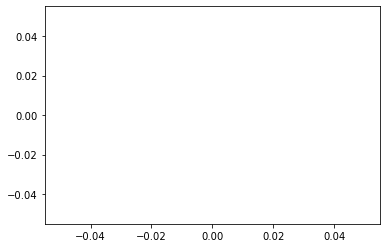

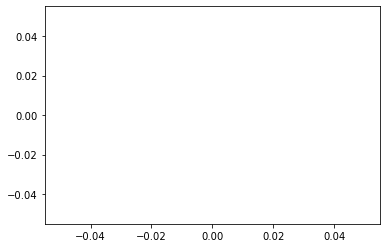

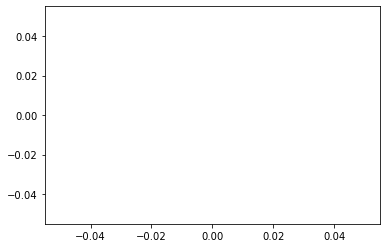

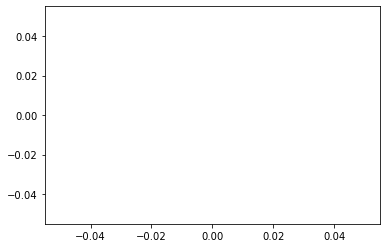

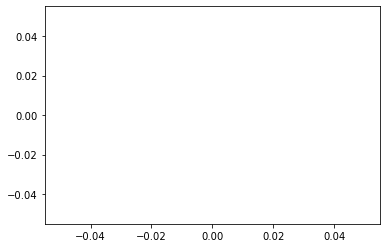

In [6]:
spatial_velocity2 = h3p_int_shifted * 0

# for i in range(np.size(spatial_velocity2, 1)):
for i in range(1):
    for j in range(1, np.size(spatial_velocity2, 0)-1):
        if j not in (15,16):
            y = np.arange(3)
            a = h3p_int_shifted[j-1][i]
            b = h3p_int_shifted[j][i]
            c = h3p_int_shifted[j+1][i]
            p = np.array((a, b, c))
#             print(j,i)
            plt.figure()
            plt.plot(y, p, 'k', label='original')
            f = sp.interpolate.interp1d(y,p)
            xnew = np.linspace(0,2,7)
            plt.figure()
            plt.plot(xnew, f(xnew), 'r.', label='interpolate')
    #         plt.legend()
#             print(f(xnew[2]), f(xnew[4]))
            p1 = f(xnew[2])
            p3 = f(xnew[4])
            di = (p3 - p1)/(p3 + p1)
            print(di)
#             dv = 7.99*di

#             if np.isreal(dv):
#                 spatial_velocity2[j,i] = dv

nan
nan
nan
nan
nan
nan
0.009437225260407136
-0.25308433096587496
nan
nan
nan
nan
0.03300923344802121
nan
-0.00033377317263769894
-0.03933786677741438
0.3974611890502156
0.019049683656581416
-0.489754922630524
-0.14025994363896013
0.2230088246901116
0.1119609907704232
0.008417956008181817
-0.00944117945053747
-0.029839878840210984
-0.07776491545975399
-0.008606496695864264


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


-0.04260987517126791
0.42742270387618514
-0.00011323541813136163
nan
nan
nan
nan


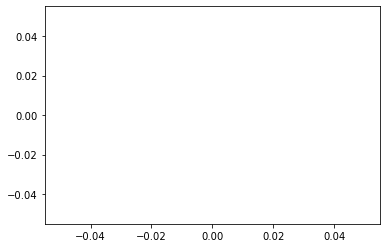

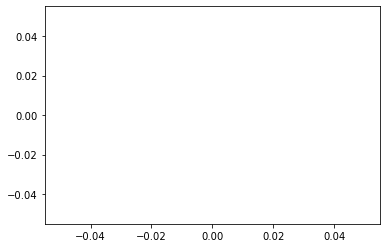

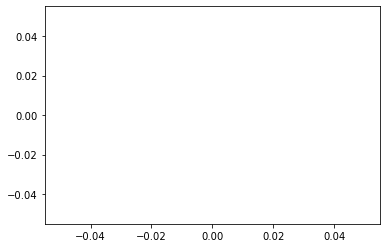

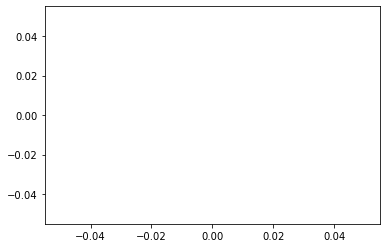

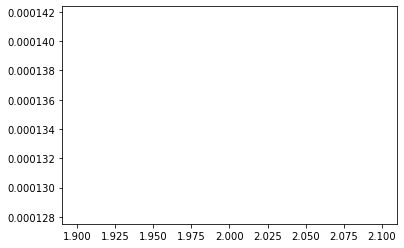

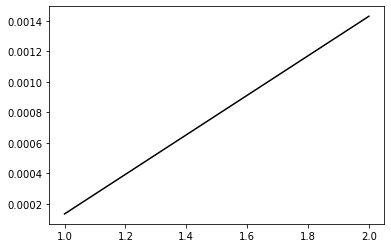

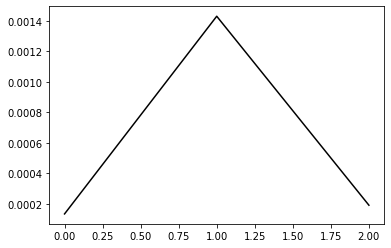

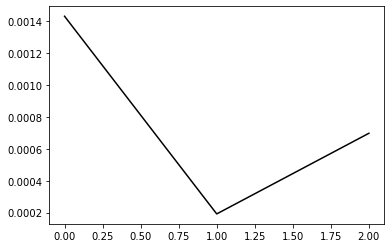

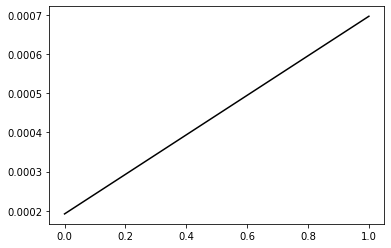

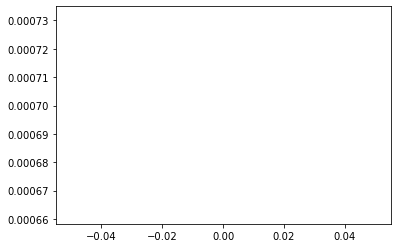

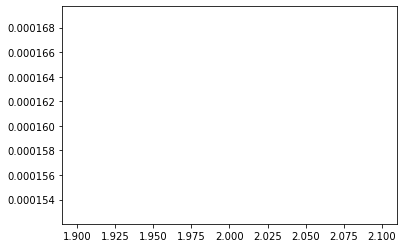

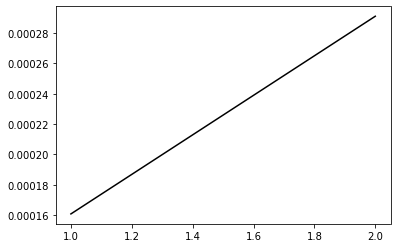

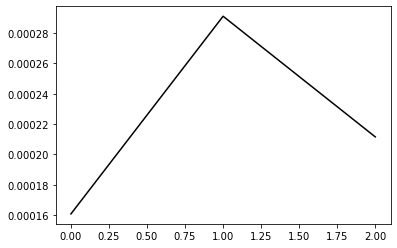

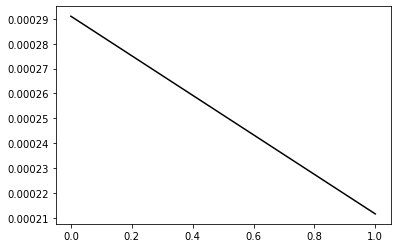

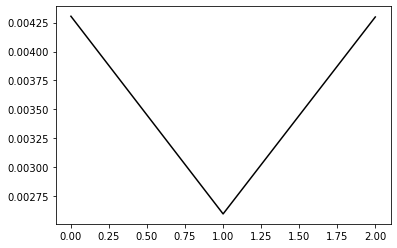

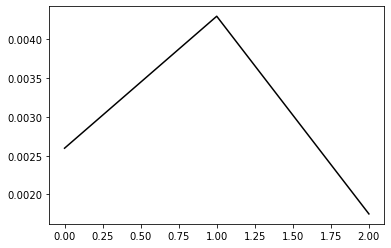

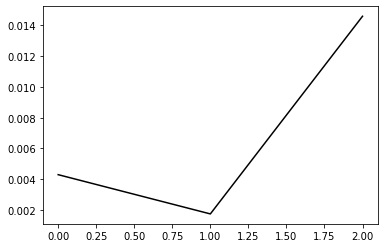

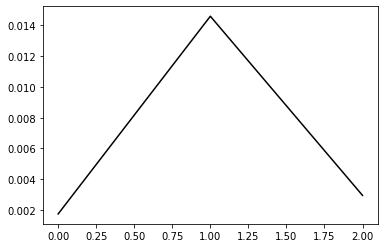

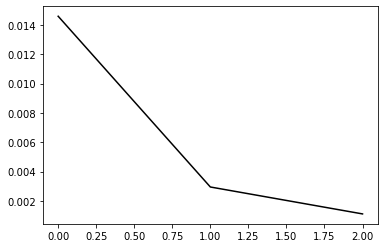

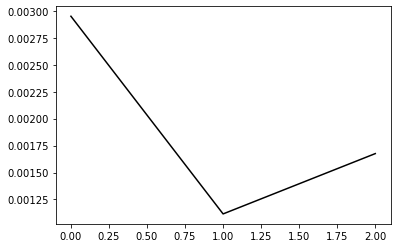

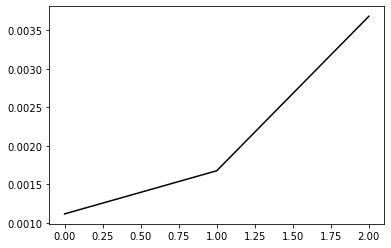

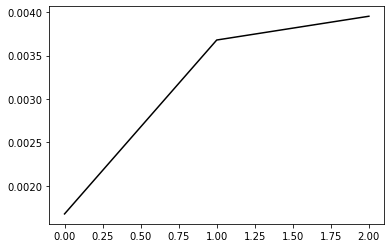

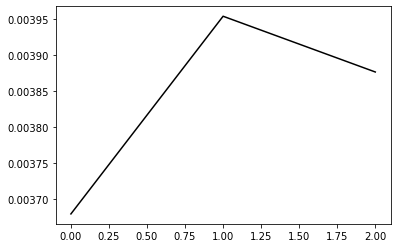

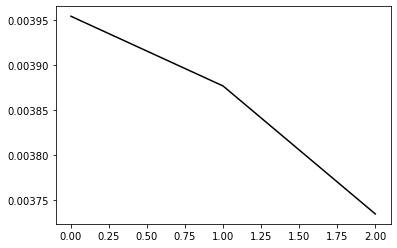

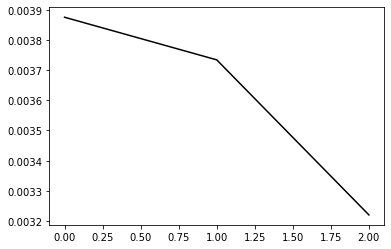

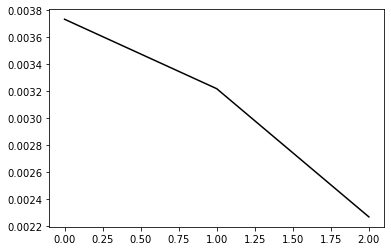

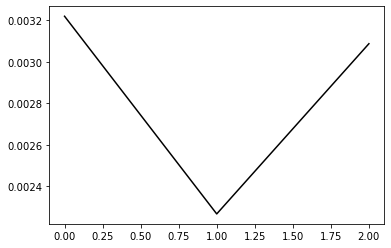

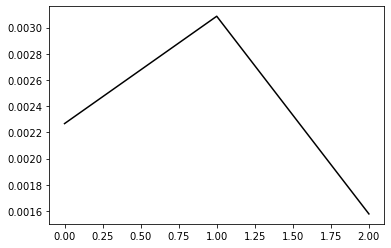

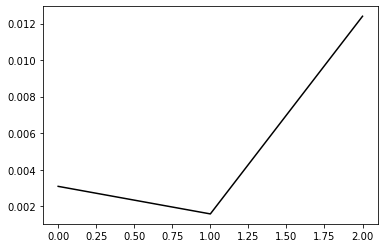

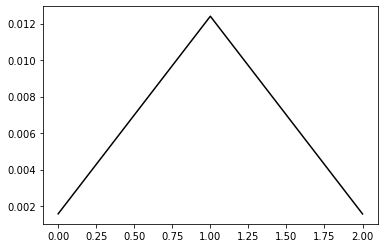

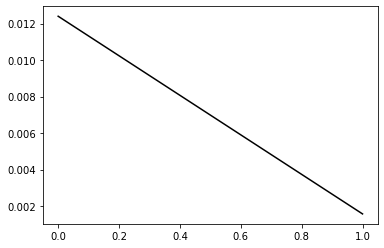

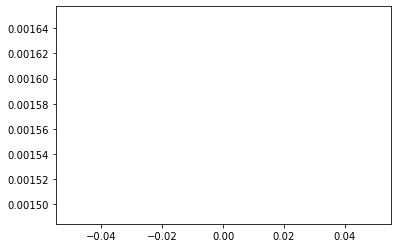

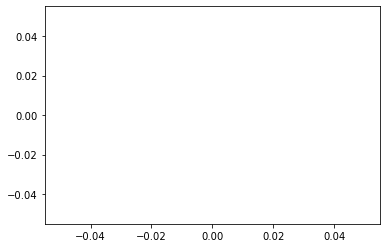

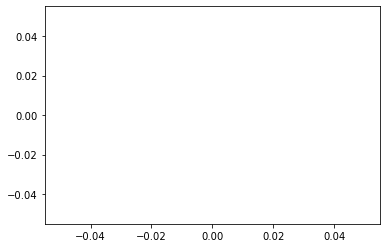

In [8]:
# for i in range(np.size(spatial_velocity2, 1)):
for i in range(1):
    for j in range(1, np.size(spatial_velocity2, 0)-1):
        if j not in (15,16):
            y = np.arange(3)
            a = h3p_int_shifted[j-1][i] #+ h3p_int_shifted_error[j-1][i]
            b = h3p_int_shifted[j][i]
            c = h3p_int_shifted[j+1][i] #- h3p_int_shifted_error[j-1][i]
            p = np.array((a, b, c))
#             print(j,i)
            plt.figure()
            plt.plot(y, p, 'k', label='original')
            f = sp.interpolate.interp1d(y,p)
            xnew = np.linspace(0,2,7)
#             plt.figure()
#             plt.plot(xnew, f(xnew), 'r.', label='interpolate')
    #         plt.legend()
#             print(f(xnew[2]), f(xnew[4]))
            p1 = f(xnew[2])
            p3 = f(xnew[4])
            di = (p3 - p1)/(p3 + p1)
            print(di)

In [4]:
spatial_velocity2 = h3p_int_shifted * np.nan

b_err = 0.10641512039513978

di1_arr = h3p_int_shifted * np.nan
di2_arr = h3p_int_shifted * np.nan
di_arr = h3p_int_shifted * np.nan

for i in range(np.size(spatial_velocity2, 1)):
# for i in range(1):
    for j in range(1, np.size(spatial_velocity2, 0)-1):
        if j not in (15,16):
            y = np.arange(3)
            a = h3p_int_shifted[j-1][i] - h3p_int_shifted_error[j-1][i]
            b = h3p_int_shifted[j][i]
            c = h3p_int_shifted[j+1][i] + h3p_int_shifted_error[j+1][i]
            p = np.array((a, b, c))
            d = h3p_int_shifted[j-1][i] + h3p_int_shifted_error[j-1][i]
            e = h3p_int_shifted[j][i]
            f = h3p_int_shifted[j+1][i] - h3p_int_shifted_error[j+1][i]
            q = np.array((d, e, f))
            l = h3p_int_shifted[j-1][i]
            m = h3p_int_shifted[j][i]
            n = h3p_int_shifted[j+1][i]
            r = np.array((l, m, n))
#             print(j,i)
#             plt.figure()
#             plt.plot(y, p, 'k', label='original')
            f1 = sp.interpolate.interp1d(y,p)
            f2 = sp.interpolate.interp1d(y,q)
            f = sp.interpolate.interp1d(y,r)
            xnew = np.linspace(0,2,7)
#             plt.figure()
#             plt.plot(xnew, f(xnew), 'r.', label='interpolate')
    #         plt.legend()
#             print(f(xnew[2]), f(xnew[4]))
            p11 = f1(xnew[2])
            p31 = f1(xnew[4])
            p12 = f2(xnew[2])
            p32 = f2(xnew[4])
            p1 = f(xnew[2])
            p3 = f(xnew[4])
            di1 = (p31 - p11)/(p31 + p11)
            di2 = (p32 - p12)/(p32 + p12)
            di = (p3 - p1)/(p3 + p1)
            
#             di1_arr.append(di1)
#             di2_arr.append(di2)
#             di_arr.append(di)
            
#             print('di1 = '+str(di1))
#             print('di2 = '+str(di2))
            sig = (di1-di2)/2.
#             sig = np.nanmean(di1-di) + np.nanmean()
#             print('sig = '+str(sig))
            
            dv = 7.99*di
            dv_err = dv * np.sqrt((b_err/7.99)**2 + (sig/di)**2)
#             print('dv_err = '+str(dv_err))
#             print('dv = '+str(dv))
            if np.isreal(dv_err):
                spatial_velocity2[j,i] = dv_err
                di1_arr[j,i] = di1
                di2_arr[j,i] = di2
                di_arr[j,i] = di
# di1_arr = np.array(di1_arr)
# di2_arr = np.array(di2_arr)
# di_arr = np.array(di_arr)
# plt.figure()
# plt.plot(di1_arr-di_arr)
# plt.plot(di_arr - di2_arr)

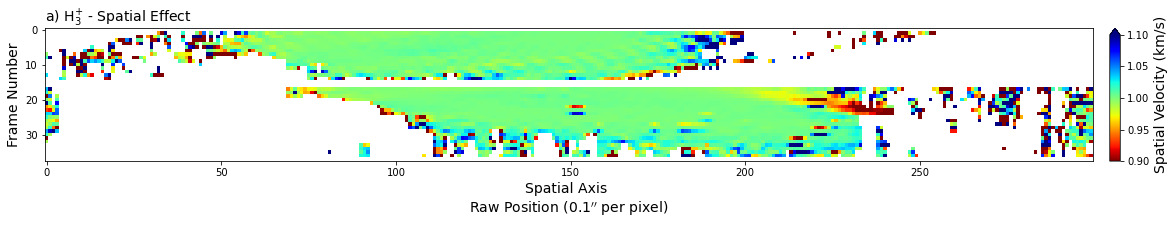

In [24]:
fig = plt.figure(figsize=(24,8), tight_layout=True)

fig.add_subplot(311)
plt.imshow((di1_arr-di_arr)/(di_arr-di2_arr), vmin=0.9, vmax=1.1, cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('a) H$_3^{+}$ - Spatial Effect', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Spatial Velocity (km/s)',size=14)

# fig.add_subplot(312)
# plt.imshow(di2_arr, cmap='jet_r')
# plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('Frame Number', fontsize=14)
# plt.title('a) H$_3^{+}$ - Spatial Effect', loc='left', fontsize=14)

# fig.add_subplot(313)
# plt.imshow(di_arr, cmap='jet_r')
# plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('Frame Number', fontsize=14)
# plt.title('a) H$_3^{+}$ - Spatial Effect', loc='left', fontsize=14)

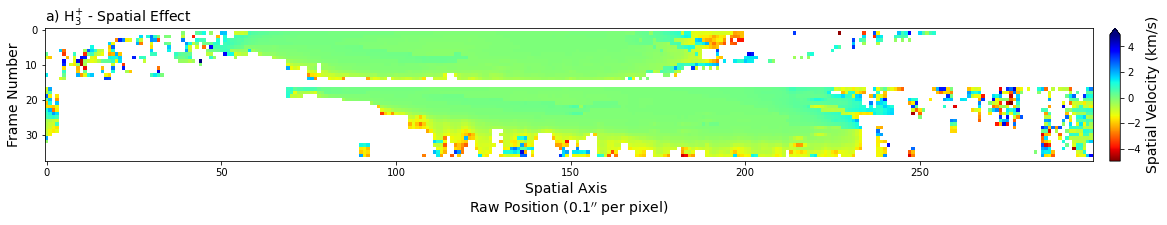

In [7]:
spatial_velocity2[spatial_velocity2 > 5] = np.nan
spatial_velocity2[spatial_velocity2 < -5] = np.nan

fig = plt.figure(figsize=(24,8), tight_layout=True)

fig.add_subplot(311)
plt.imshow(spatial_velocity2, cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('a) H$_3^{+}$ - Spatial Effect', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Spatial Velocity (km/s)',size=14)

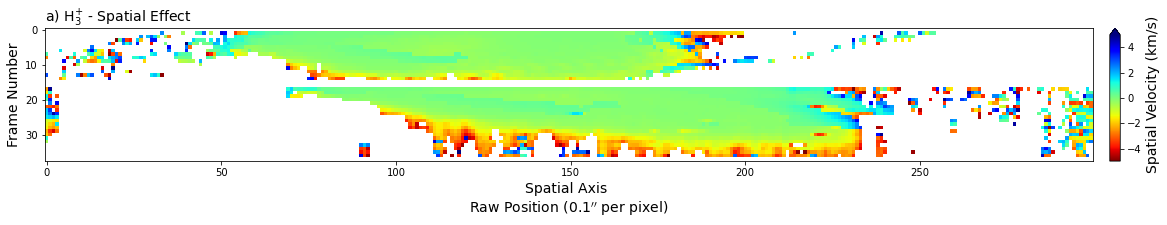

In [71]:
spatial_velocity2[spatial_velocity2 > 5] = np.nan
spatial_velocity2[spatial_velocity2 < -5] = np.nan

fig = plt.figure(figsize=(24,8), tight_layout=True)

fig.add_subplot(311)
plt.imshow(spatial_velocity2, cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('a) H$_3^{+}$ - Spatial Effect', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Spatial Velocity (km/s)',size=14)

In [8]:
np.nanmin(spatial_velocity2)

-4.979869206312767

In [9]:
hdu = fits.PrimaryHDU(spatial_velocity2)
hdu.writeto('h3p_spat_err.fits', overwrite=True)

In [57]:
avg_crop_best_fit[np.where(x_fit==150)][0]

83.97360503088187

In [58]:
avg_box_best_fit[np.where(x_axis==150)][0]

82.97593663879954

In [59]:
avg_crop_best_fit[np.where(x_fit==150)][0] - avg_box_best_fit[np.where(x_axis==149)][0]

1.0609962473605066

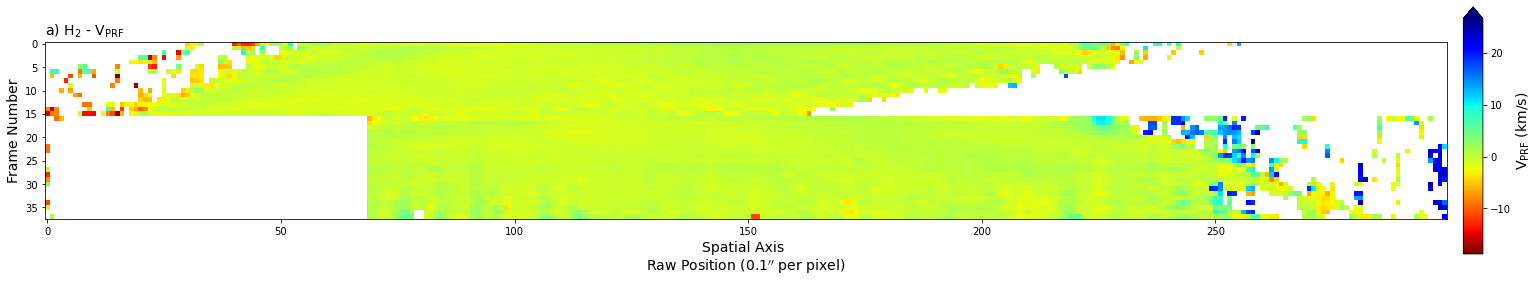

In [61]:
ang_diam = 40.58867
ang_diam/(0.1)
limb_vel = 12.572
vel_slope = limb_vel * 2 / (ang_diam/(0.1))

x = np.linspace(0,299,300)
rot_rate = vel_slope * x
rot_rate = rot_rate - rot_rate[150]

h2_plan_vel = h2_los_rel + 0

for i in range(np.size(h2_los_rel, 0)):
    h2_plan_vel[i,:] = h2_los_rel[i,:] - rot_rate


spatial_velocity = h2_los_rel + 0
spatial_velocity[::] = 0

for i in range(np.size(spatial_velocity, 1)):
    for j in range(1, np.size(spatial_velocity, 0)-1):
        if j not in (15,16):
            y = np.arange(3)
            p = np.array((h2_int_shifted[j-1][i], h2_int_shifted[j][i], h2_int_shifted[j+1][i]))
#             print(j,i)
#             plt.figure()
#             plt.plot(y, p, 'k.', label='original')
            f = scipy.interpolate.interp1d(y,p)
            xnew = np.linspace(0,2,7)
#             plt.figure()
#             plt.plot(xnew, f(xnew), 'r.', label='interpolate')
#             plt.legend()
#             print(f(xnew[2]), f(xnew[4]))
            p1 = f(xnew[2])
            p3 = f(xnew[4])
            di = (p3 - p1)/(p3 + p1)
            dv = 7.6*di
            
            if np.isreal(dv):
                spatial_velocity[j,i] = dv
                
spatial_velocity2 = spatial_velocity + 0
spatial_velocity2[np.isnan(h2_int_shifted_error)] = np.nan
spatial_velocity2[spatial_velocity <= 1.5] = np.nan

h2_plan_vel2 = h2_plan_vel + 0
h2_plan_vel2[h2_plan_vel2 < -1] = np.nan
h2_plan_vel2[h2_plan_vel2 > 5] = np.nan
h2_plan_vel2[h2_los_shifted_error > 1] = np.nan
h2_plan_vel2[np.isnan(spatial_velocity2)] = np.nan

# spatial_velocity2[np.isnan(h2_plan_vel2)] = np.nan

# a = spatial_velocity2[np.isfinite(spatial_velocity2)]
# b = h2_plan_vel2[np.isfinite(h2_plan_vel2)]

# print(10/(np.mean(a[60:220])/np.mean(b[60:220])))

# # spatial_velocity.shape
# plt.figure()
# plt.plot(a, 'k--')
# plt.plot(b, 'r-')

h2_corrected_vel = h2_plan_vel - spatial_velocity
# h2_corrected_vel[h2_corrected_vel > 2] = 2
# h2_corrected_vel[h2_corrected_vel < -2] = -2

fig = plt.figure(figsize=(24,4), tight_layout=True)

fig.add_subplot(111)
plt.imshow(h2_corrected_vel*(-1), cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('a) H$_2$ - V$_{\mathrm{PRF}}$', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

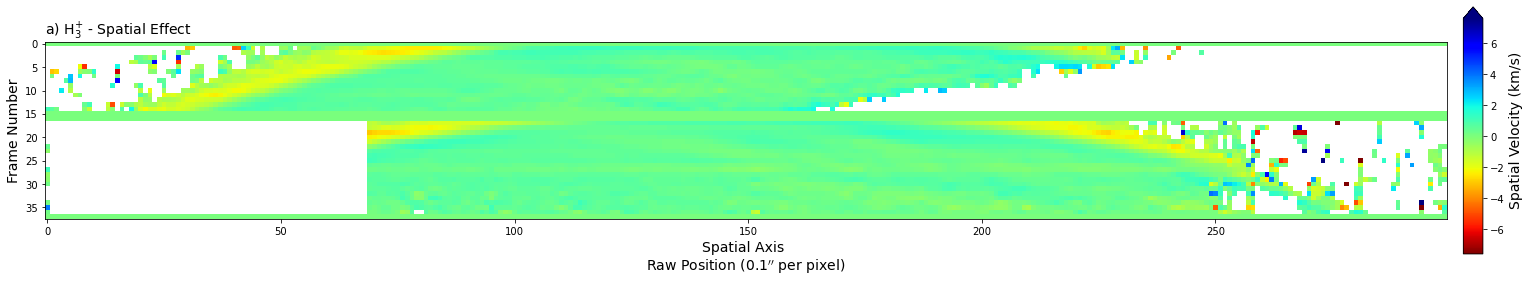

In [62]:
fig = plt.figure(figsize=(24,4), tight_layout=True)

fig.add_subplot(111)
plt.imshow(spatial_velocity*(-1), cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('a) H$_3^{+}$ - Spatial Effect', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Spatial Velocity (km/s)',size=14)

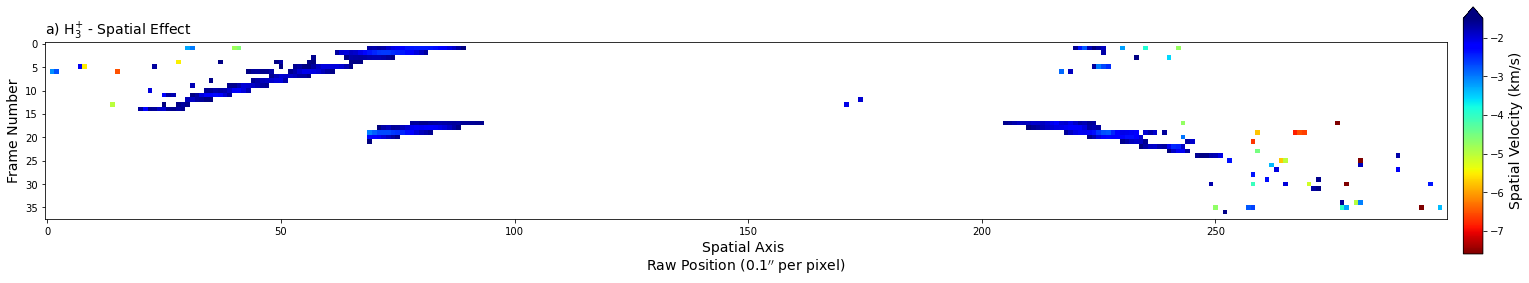

In [63]:
fig = plt.figure(figsize=(24,4), tight_layout=True)

fig.add_subplot(111)
plt.imshow(spatial_velocity2*(-1), cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('a) H$_3^{+}$ - Spatial Effect', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Spatial Velocity (km/s)',size=14)

In [73]:
crop3a = np.delete(spatial_velocity2[3:6], np.s_[220:], axis=1)
crop3b = np.delete(crop3a, np.s_[:200], axis=1)
crop4a = np.delete(spatial_velocity2[7:10], np.s_[120:], axis=1)
crop4b = np.delete(crop4a, np.s_[:100], axis=1)
crop4b

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan]])

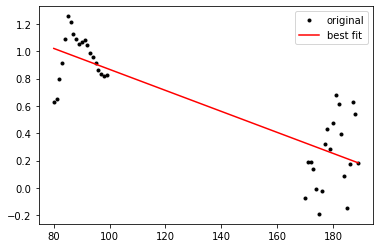

In [65]:
crop3a = np.delete(h2_corrected_vel[3:6], np.s_[100:], axis=1)
crop3b = np.delete(crop3a, np.s_[:80], axis=1)
crop4a = np.delete(h2_corrected_vel[7:10], np.s_[190:], axis=1)
crop4b = np.delete(crop4a, np.s_[:170], axis=1)

# plt.figure(figsize=(10,5))
# plt.imshow(crop3b, cmap='jet', norm=colors.PowerNorm(gamma=0.2))
# plt.figure(figsize=(10,5))
# plt.imshow(crop4b, cmap='jet', norm=colors.PowerNorm(gamma=0.2))

avg_crop3b = np.mean(crop3b, axis=0)
avg_crop4b = np.mean(crop4b, axis=0)
line3 = np.linspace(80, 99,20)
line4 = np.linspace(170,189,20)
# line3 = np.arange(80,100)
# line4 = np.arange(170,190)

line_tot2 = np.concatenate((line3,line4))
avg_crop_tot2 = np.concatenate((avg_crop3b, avg_crop4b))

# best fit line
mod = LinearModel()

pars_crop2 = mod.guess(avg_crop_tot2, x=line_tot2)
out_crop2 = mod.fit(avg_crop_tot2, pars_crop2, x=line_tot2)

# print(out.fit_report(min_correl=0.25))

m2 = out_crop2.params['slope'].value
y02 = out_crop2.params['intercept'].value
sig_m2 = out_crop2.params['slope'].stderr
sig_y02 = out_crop2.params['intercept'].stderr

x_fit2 = np.linspace(80,189,110)
# x_fit2 = np.arange(80,190)
avg_crop2_fit = m2 * x_fit2 + y02
avg_crop2_error = np.sqrt(sig_m2**2 + sig_y02**2)

plt.figure()
plt.plot(line_tot2, avg_crop_tot2,'.k', label = 'original')
plt.plot(x_fit2, avg_crop2_fit, 'r', label = 'best fit')
plt.legend()

In [66]:
avg_crop2_error

0.11748337921174645

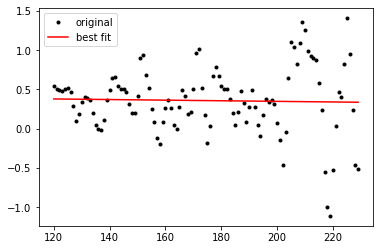

In [67]:
box3a = np.delete(h2_corrected_vel[30:35], np.s_[230:], axis=1)
box3b = np.delete(box3a, np.s_[:120], axis=1)

avg_box3b = np.mean(box3b, axis=0)

x_box3b = np.arange(120, 230)

mod = LinearModel()

pars_box3b = mod.guess(avg_box3b, x=x_box3b)
out_box3b = mod.fit(avg_box3b, pars_box3b, x=x_box3b)

# print(out.fit_report(min_correl=0.25))

k2 = out_box3b.params['slope'].value
b2 = out_box3b.params['intercept'].value
sig_k2 = out_box3b.params['slope'].stderr
sig_b2 = out_box3b.params['intercept'].stderr

avg_box3b_fit = k2 * x_box3b + b2
avg_box3b_error = np.sqrt(sig_k2**2 + sig_b2**2)

plt.figure()
plt.plot(x_box3b, avg_box3b,'.k', label = 'original')
# np.savetxt('h2_box.txt', avg_box)
plt.plot(x_box3b, avg_box3b_fit, 'r', label = 'best fit')
plt.legend()

In [68]:
avg_box3b_error

0.22954162286466917

In [75]:
print(avg_crop2_fit[np.where(x_fit2==150)][0])
print(avg_box3b_fit[np.where(x_box3b==150)][0])
print(avg_crop2_fit[np.where(x_fit2==150)][0] - avg_box3b_fit[np.where(x_box3b==150)][0])

0.483157552265177
0.3669433855501023
0.11621416671507467


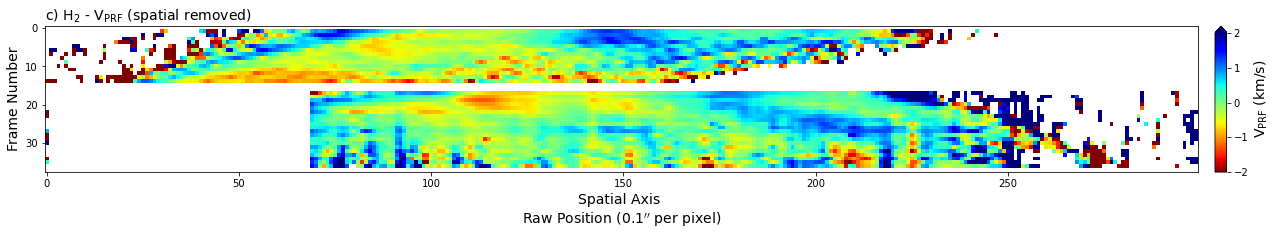

In [70]:
h2_corrected_vel_sec1 = np.delete(h2_corrected_vel, np.s_[16:], axis=0)
h2_corrected_vel_sec2 = np.delete(h2_corrected_vel, np.s_[:16], axis=0)

h2_vprf_sec1 = h2_corrected_vel_sec1 - avg_crop2_fit[np.where(x_fit2==150)][0]
# h2_vprf_sec2 = h2_corrected_vel_sec2 - h2_vel_best_fit2[np.where(x_axis2==149)][0]
h2_vprf_sec2 = h2_corrected_vel_sec2 - avg_box3b_fit[np.where(x_box3b==150)][0]

h2_vprf = np.vstack((h2_vprf_sec1, h2_vprf_sec2))
h2_vprf[h2_vprf > 2] = 2
h2_vprf[h2_vprf < -2] = -2
h2_vprf[0] = np.nan
h2_vprf[15] = np.nan
h2_vprf[16] = np.nan
h2_vprf[-1] = np.nan

fig = plt.figure(figsize=(24,8), tight_layout=True)

# fig.add_subplot(311)
# plt.imshow(spatial_velocity2*(-1), cmap='jet_r')
# plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('Frame Number', fontsize=14)
# plt.title('a) H$_2$ - Spatial Effect', loc='left', fontsize=14)
# plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Spatial Velocity (km/s)',size=14)

# fig.add_subplot(312)
# plt.imshow(h2_plan_vel2*(-1), cmap='jet_r')
# plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('Frame Number', fontsize=14)
# plt.title('b) H$_2$ - V$_{\mathrm{PRF}}$', loc='left', fontsize=14)
# plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

fig.add_subplot(313)
plt.imshow(h2_vprf*(-1), cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('c) H$_2$ - V$_{\mathrm{PRF}}$ (spatial removed)', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

In [71]:
hdu1 = fits.PrimaryHDU(spatial_velocity2)
hdu1.writeto('h2_spatial_vel2.fits', overwrite=True)

hdu2 = fits.PrimaryHDU(h2_plan_vel2)
hdu2.writeto('h2_plan_vel2.fits', overwrite=True)

hdu3 = fits.PrimaryHDU(h2_vprf)
hdu3.writeto('h2_vprf.fits', overwrite=True)